In [1]:
from data_extraction import *
from neural_network_recreate_01 import *
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
X_train = np.asarray(read_image_file(IMAGES_TRAIN)) / 255.0
Y_train = np.asarray(read_label_file(LABELS_TRAIN))

In [ ]:
def plot_numbers(df, n, m):
    f, axarr = plt.subplots(n, m, figsize=(6, 6))
    for i in range(n):
        for j in range(m):
            axarr[i, j].imshow(df[m * i + j], cmap='gray_r')
            axarr[i, j].tick_params(
                axis='both', which='both',
                bottom='off', top='off', right='off', left='off',
                labelbottom='off', labelleft='off'
            )

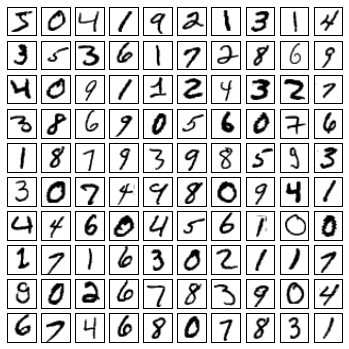

In [3]:
plot_numbers(X_train, 10, 10)

In [4]:
X_train = np.asarray([x.reshape(28 * 28) for x in X_train])
X_train.shape

(60000L, 784L)

In [5]:
Y_train = np.asarray([y == np.arange(10) for y in Y_train]).astype(int)
Y_train.shape

(60000L, 10L)

In [6]:
nn = NeuralNetwork(layers=[
    SigmoidLayer(15, bias=False),
    SoftmaxLayer(10)
], input_bias=True, loss_function='NLL', regular_type='l2', alpha=1e-5)

99 2.625 1


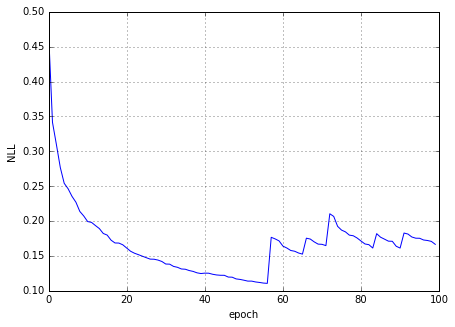

In [8]:
nn.fit(X_train, Y_train, n_epoch=100, batch_size=1000, learning_params=(3.5, 0.75, 65))
plt.figure(figsize=(7, 5))
plt.plot(nn.error)
plt.xlabel('epoch')
plt.ylabel(nn.loss_function)
plt.grid()

In [9]:
n_objects, offset = None, 0
X_test = np.asarray(read_image_file(IMAGES_TEST, n_objects=n_objects, offset=offset)) / 255.0
Y_test = np.asarray(read_label_file(LABELS_TEST, n_objects=n_objects, offset=offset))

In [10]:
X_test = np.asarray([x.reshape(28 * 28) for x in X_test])

In [11]:
Y_predicted = nn.predict(X_test, batch_size=1000)
Y_predicted = np.argmax(Y_predicted, axis=1)

In [13]:
(Y_predicted == Y_test).all(), "{}%".format(100.0 * np.sum(Y_predicted == Y_test) / n_objects)

(False, '93.8%')